# Are global warming trends occurring globally or only in certain areas?

# 1. Project One

## 1.1 Introduction
  How have the average temperatures, standard deviations, temperature changes, and maximum temperature changes varied over time across different areas and the entire surface of the Earth, including land and ocean? Does the Earth experience warming trends in only certain cities or countries or across the entire surface?

  Global warming has been a major concern for humanity for several decades. News reports show that coral die-offs are happening in various regions and record temperatures are being recorded in some places. Despite this, some people still believe that global warming is just a conspiracy, while others take extreme actions in response to their excessive concern.

  In this project we will discuss and take a look with real data from Berkeley Earth. (n.d.). Climate Change: Earth Surface Temperature Data. The temperature records of the entire surface of the Earth, spanning thousands of cities and nearly all countries, have been documented over the last three centuries. These records include the average temperature, average temperature uncertainty, time, location, and other relevant information. By analyzing these records, we can observe the changes in global and local temperatures over time and measure the stability of the global and local temperature trends. This will give us a better understanding of how average temperature is changing globally and locally, providing an evidence of climate change.

  To answer the research question on how the average temperatures, standard deviations, temperature changes, and maximum temperature changes have varied over time across different cities and the entire surface of the Earth, including land and ocean, we will be using the Y variables of average temperature, maximum temperature, standard deviation of temperature, and temperature. These variables will be analyzed against the X variables of location and years. Specifically, we will focus on the global land plus ocean and six cities, including Faisalabad, Shanghai, Lahore, Nanjing, Alexandria, and Chengdu. These locations were selected because they represent diverse geographic areas and have significant populations, making them highly relevant for examining local and global climate trends. Also these six cities have same latitude. By examining these factors in relation to location and time, we can better understand how climate is changing on a global scale, and whether the warming trends are occurring in certain cities.
  
  After analyzing the temperature records for the six selected cities and the global land and ocean, it has been found that the average temperature has increased by 1-2 degrees Celsius during the last two centuries. This indicates a global warming trend, which is a major concern for mitigating the effects of climate change.

## 1.2 Data loading and cleaning
In our research project on climate change, we needed to obtain data on average temperature, maximum temperature, standard deviation of temperature, and temperature over time for land, land plus ocean, and six cities: Faisalabad, Shanghai, Lahore, Nanjing, Alexandria, and Chengdu.

### Major Cities Temperature Data
We will first read the major city temperature data. It records the average temperature over month, city name, country, latitude, longitude, and average temperature uncertainty. Then we read global temperature data, and it records the land, land and ocean average temperature, average temperature uncertainty, maximum temperature over time.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
#Read data
file_path = "/Users/nick0o0o0/Library/Mobile Documents/com~apple~CloudDocs/gxyfile/third_year/ECO225/Project_Two/archive/"

country_temp = pd.read_csv(file_path + "GlobalLandTemperaturesByCountry.csv")
major_city_temp = pd.read_csv(file_path + "GlobalLandTemperaturesByMajorCity.csv")

global_temp = pd.read_csv(file_path + "GlobalTemperatures.csv")

In [4]:
major_city_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


### New Columns: Year, Month, NumLatitude, and Hemisphere for major city data
Now we will do data cleaning to create number version of Latitude in column NumLatitude and one string indicate which hemisphere it is in Hemisphere. With these column we will easy to find cities has similar latitude and esay to campare their data. We compare these data since they should have similar temperature as they has similar latitude. Also we will create new column called Year and Month to track the year and month seperatly. These two column are number so it is easy for us to slicing later on.

In [82]:
for row in major_city_temp.iterrows():
    index_value, column_value = row
    
    lati = column_value["Latitude"]
    time = column_value["dt"]

    if "N" in lati:
        major_city_temp.at[index_value, "Hemisphere"] = "N"
        major_city_temp.at[index_value, "NumLatitude"] = float(lati.replace("N",""))
        
    else:
        major_city_temp.at[index_value, "Hemisphere"] = "S"
        major_city_temp.at[index_value, "NumLatitude"] = float(lati.replace("S",""))
    
    major_city_temp.at[index_value, "Year"] = int(time[0:4])
    major_city_temp.at[index_value, "Month"] = int(time[5:7])


### Change datatype to int for Year, Month, and RoundLati
Next we create a column called RoundLati which is the rounded latitude for that city since it may difficult to find several cities has the same and precise latitude in this data. We use rounded function to have a integer for the Latitude. Change the datatype for Year, Month, and RoundLati to integer.

In [81]:
major_city_temp["RoundLati"] = round(major_city_temp["NumLatitude"])
major_city_temp["Year"] = major_city_temp["Year"].astype(int)
major_city_temp["Month"] = major_city_temp["Month"].astype(int)
major_city_temp["RoundLati"] = major_city_temp["RoundLati"].astype(int)


### Groupby city and year
Working on data over month may have too much data, so we want to get a aggregation with year. Next we use groupby method to get the average, standard deviation, maximum, and difference of temperature over each year of each city in major city data. This is useful when we want to compare data over year.

Below is the average temperature of each city of each year

In [80]:
major_copy = major_city_temp.copy()
MajorCity_year_average = major_copy.groupby(["City", "Year"]).mean()
MajorCity_year_average.rename(columns={"AverageTemperature": "YearAverageTemperature"}, inplace=True)


Below is the average temperature standanr deviation of each city of each year.

In [79]:
MajorCity_year_std = major_copy.groupby(["City", "Year"]).std()
MajorCity_year_std.rename(columns={"AverageTemperature": "YearAverageTemperatureStd"}, inplace=True)


Below is the maxmum temperature of each city of each year

In [78]:
MajorCity_year_Max = major_copy.groupby(["City", "Year"]).max()
MajorCity_year_Max.rename(columns={"AverageTemperature": "YearAverageTemperatureMax"}, inplace=True)


Below is the average temperature difference of each city of each year

In [77]:
Major3Col = major_copy[["City", "Year", "AverageTemperature"]]

Major3Col["AverageTemperature"].astype(float)

MajorCity_year_Dif = Major3Col.groupby(["City", "Year"]).max() - Major3Col.groupby(["City", "Year"]).min()
MajorCity_year_Dif.rename(columns={"AverageTemperature": "YearAverageTemperatureDifference"}, inplace=True)


### Cities with similar Latitude with Shanghai
Shanghai is my hometown, so I choose it and get a list of City with same latitude with it. Now the NumLatitude and Hemisphere are useful. First let's find the latitude of Shanghai. Then use locate a list of cities in the data tha has the similar latitude with Shanghai.

In [84]:
Shanghai_lati = major_city_temp.set_index("City").loc["Shanghai",["RoundLati", "Hemisphere"]]

In [87]:
SameLati_Shanghai = major_city_temp.set_index(["RoundLati", "Hemisphere"]).loc[31, "N"]["City"]

/var/folders/km/vjt389x91b93k1_jy0g3jscc0000gn/T/ipykernel_20284/1390243631.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  SameLati_Shanghai = major_city_temp.set_index(["RoundLati", "Hemisphere"]).loc[31, "N"]["City"]


These will be useful for slicing for a pivot table later on. Since graph all cities temperature is hard to see the trend. We pick these cities because they have the same latitude.

In [88]:
SameLati_Shanghai = list(set(SameLati_Shanghai))

### Pivot Table of average, standard deviation,  maximum, and difference of temperature for major cities over year
We use cleaned data in 2.1.5 to track and create pivot table for average, standard deviation, max, and difference of temperature with city name as the columns and year as the index. These help us to only focus on city, year, and temperature.

#### Pivot Table of average temperature of major cities over years

In [76]:
NoIndex_majorAvg = MajorCity_year_average.reset_index()
YearTempPivotTable = NoIndex_majorAvg.pivot_table(values="YearAverageTemperature", index="Year", columns="City")

#### Pivot Table of standard deviation of temperature of major cities over years

In [75]:
NoIndex_majorAvg = MajorCity_year_std.reset_index()
YearTempStdPivotTable = NoIndex_majorAvg.pivot_table(values="YearAverageTemperatureStd", index="Year", columns="City")

#### Pivot Table of maximum of temperature of major cities over years

In [74]:
NoIndex_majorAvg = MajorCity_year_Max.reset_index()
YearTempMaxPivotTable = NoIndex_majorAvg.pivot_table(values="YearAverageTemperatureMax", index="Year", columns="City")

#### Pivot Table of temperature difference of major cities over years

In [73]:
NoIndex_majorAvg = MajorCity_year_Dif.reset_index()
YearTempDifPivotTable = NoIndex_majorAvg.pivot_table(values="YearAverageTemperatureDifference", index="Year", columns="City")

### Global temprature data
We will do data cleaning to global temperature too and create a new column called year to track which year of each row. We first do groupby year to get a average, standard deviationm, maximum temperature and temperature difference of land, ocean of earth over years.

In [71]:
for row in global_temp.iterrows():
    row_index, row_values = row
    global_temp.at[row_index, "Year"] = row_values["dt"][0:4]


#### Global average temperature group by years
Also create two columns called Land>=8.5 and LandOcean>=15.5 to indicate whether the average temperature of land is exceed 8.5 and average temperature of land and ocean exceed 15.5 that year. 

In [70]:
YearAverageGlobal = global_temp.groupby("Year").mean()
YearAverageGlobal.index = YearAverageGlobal.index.astype(int)

for row in YearAverageGlobal.iterrows():
    row_index, row_values = row
    LandAvg = row_values["LandAverageTemperature"]
    OceanLandAvg = row_values["LandAndOceanAverageTemperature"]
    
    if LandAvg >= 8.5:
        YearAverageGlobal.at[row_index, "Land>=8.5"] = 1
    else:
        YearAverageGlobal.at[row_index, "Land>=8.5"] = 0
        
    if OceanLandAvg >= 15.5:
        YearAverageGlobal.at[row_index, "LandOcean>=15.5"] = 1
    else:
        YearAverageGlobal.at[row_index, "LandOcean>=15.5"] = 0


#### Global average standard deviation temperature group by years

In [69]:
YearStdGlobal = global_temp.groupby("Year").std()
YearStdGlobal.index = YearStdGlobal.index.astype(int)

#### Global maximum temperature group by years
Also create two columns called Land>=20.5 and LandOcean>=17 to indicate whether the maximum temperature of land is exceed 20.5 and average temperature of land and ocean exceed 17 that year. 

In [68]:
YearMaxGlobal = global_temp.groupby("Year").max()
YearMaxGlobal.index = YearMaxGlobal.index.astype(int)

for row in YearMaxGlobal.iterrows():
    row_index, row_values = row
    LandAvg = row_values["LandMaxTemperature"]
    OceanLandAvg = row_values["LandAndOceanAverageTemperature"]
    
    if LandAvg >= 20.5:
        YearMaxGlobal.at[row_index, "Land>=20.5"] = 1
    else:
        YearMaxGlobal.at[row_index, "Land>=20.5"] = 0
        
    if OceanLandAvg >= 17:
        YearMaxGlobal.at[row_index, "LandOcean>=17"] = 1
    else:
        YearMaxGlobal.at[row_index, "LandOcean>=17"] = 0


#### Global difference temperature group by years

In [67]:
global_temp_copy = global_temp.drop(global_temp.columns[0], axis=1)
global_list = global_temp_copy.columns.to_list()
for col in global_list:
    global_temp_copy[col].astype(float)
    
YearDifGlobal = global_temp_copy.groupby("Year").max() - global_temp_copy.groupby("Year").min()
YearDifGlobal.index = YearDifGlobal.index.astype(int)

## 1.3 Summary Statistics Tables
Let's now summarize what we have accomplished and highlight which data is important. We have created four types of pivot tables for major cities and global temperature. These tables display the average, maximum, standard deviation, and difference of temperature changes over the years for Faisalabad, Shanghai, Lahore, Nanjing, Alexandria, and Chengdu or the global land and ocean. The average and maximum temperatures are useful and convenient for plotting. In the next section, we can analyze the temperature trend over the years by graphing these variables. The standard deviation of temperature and temperature difference changes over the years provide insights into the stability of the global or local temperature. If the standard deviation increases, it means the temperature for 12 months is becoming more dispersed, indicating that the weather in the same area is becoming more extreme. If the temperature difference increases, it means the difference between the lowest and highest monthly temperature is becoming greater. These variables can be used to study both the global and specific city temperatures.

Below is a summary of the data cleaning process that we have carried out.

### Data for selected cities

#### Pivot Table of average temperature of Faisalabad, Shanghai, Lahore, Nanjing, Alexandria, and Chengdu
Each cell in the dataset represents the average temperature of the corresponding city and year. The dataset is missing data for the year 2013. By analyzing the data, we can observe that Shanghai, Nanjing, Alexandria, and Chengdu have all experienced an increase in average temperature by 1-2 degrees Celsius when comparing the data from 1841 and 2012. These findings are consistent with global temperature trends, which have also shown an increase in average temperature over the last two centuries.

In [45]:
YearTempPivotTable[SameLati_Shanghai].dropna()

City,Faisalabad,Shanghai,Lahore,Nanjing,Alexandria,Chengdu
Year,,,,,,
1841,24.031300,14.869583,24.031300,14.495167,20.084750,9.833083
1842,25.042111,15.427667,25.042111,15.060500,19.919250,10.235167
1843,23.713667,15.528833,23.713667,15.159917,19.906000,10.327000
1844,23.233500,15.331583,23.233500,14.980833,19.766417,10.031167
1845,23.485083,15.426083,23.485083,15.042500,20.054500,9.963333
...,...,...,...,...,...,...
2009,25.365750,17.012000,25.365750,16.631583,21.670500,11.616583
2010,25.477917,16.748417,25.477917,16.443083,22.459583,11.368083
2011,24.975250,16.518000,24.975250,16.218917,21.181500,11.074333


#### Pivot Table of max temperature of Faisalabad, Shanghai, Lahore, Nanjing, Alexandria, and Chengdu
Each cell in the dataset corresponds to the maximum temperature recorded in the corresponding city and year. Upon analyzing the data, we observe that all cities, namely Faisalabad, Shanghai, Lahore, Nanjing, Alexandria, and Chengdu, have experienced an increase of 1-2 degrees Celsius in the average maximum temperature during the hottest month of the year, when comparing the years 1841 and 2012. This upward trend in maximum temperature over time is statistically significant and indicates a pattern of global warming.

In [46]:
YearTempMaxPivotTable[SameLati_Shanghai].dropna()

City,Faisalabad,Shanghai,Lahore,Nanjing,Alexandria,Chengdu
Year,,,,,,
1841,33.106,27.783,33.106,27.611,27.251,19.818
1842,31.870,27.013,31.870,26.575,25.545,18.574
1843,33.110,27.372,33.110,27.076,25.976,19.270
1844,32.916,27.434,32.916,27.030,26.115,18.933
1845,33.062,28.089,33.062,27.810,26.502,19.429
...,...,...,...,...,...,...
2009,34.687,28.560,34.687,28.440,27.663,19.945
2010,33.970,30.128,33.970,29.596,28.806,20.798
2011,34.134,29.253,34.134,28.622,27.637,20.359


#### Pivot Table of temperature difference of Faisalabad, Shanghai, Lahore, Nanjing, Alexandria, and Chengdu
Every cell in the dataset corresponds to the average temperature difference of the corresponding city and year. Statistical analysis shows that Faisalabad, Shanghai, Lahore, and Nanjing have experienced an increase in temperature difference of about 1 degree Celsius when comparing 1841 and 2012. In contrast, Alexandria has experienced a decrease in temperature difference of about 1 degree Celsius during the same period. These findings indicate that the magnitude and direction of temperature changes can vary across different regions, and it is important to consider both local and global trends when examining the effects of climate change. 

In [47]:
YearTempDifPivotTable[SameLati_Shanghai].dropna()

City,Faisalabad,Shanghai,Lahore,Nanjing,Alexandria,Chengdu
Year,,,,,,
1841,21.935,25.974,21.935,26.474,13.530,20.554
1842,17.766,23.985,17.766,24.236,12.641,18.488
1843,20.716,23.548,20.716,23.962,11.393,18.529
1844,20.949,24.487,20.949,24.731,12.991,18.651
1845,21.473,24.893,21.473,25.672,13.214,20.323
...,...,...,...,...,...,...
2009,20.513,25.310,20.513,25.695,12.071,18.819
2010,22.160,25.493,22.160,25.390,12.547,19.248
2011,22.727,28.553,22.727,28.478,12.000,21.806


#### Pivot Table of standard deviation temperature of Faisalabad, Shanghai, Lahore, Nanjing, Alexandria, and Chengdu
Every cell correpsond the standard deviation of temperature of corresponging city and corresponging year.It is important to note that while none of these cities showed a significant change in temperature variation between 1841 and 2012, this could still have important implications for climate change research. Specifically, changes in the standard deviation of temperature could indicate changes in weather patterns or increased frequency of extreme temperature events, both of which can have significant impacts on local ecosystems and human health. Therefore, even if the changes in standard deviation are not statistically significant, they should still be carefully monitored and analyzed for potential long-term effects.

In [48]:
YearTempStdPivotTable[SameLati_Shanghai].dropna()

City,Faisalabad,Shanghai,Lahore,Nanjing,Alexandria,Chengdu
Year,,,,,,
1841,8.491180,9.174271,8.491180,9.353196,5.003125,7.307309
1842,6.291019,8.503102,6.291019,8.701414,4.519192,6.633742
1843,7.690557,8.422991,7.690557,8.612064,4.224156,6.652217
1844,7.934288,8.780892,7.934288,8.946557,4.674841,6.815748
1845,8.165247,9.122108,8.165247,9.359394,4.594745,7.339130
...,...,...,...,...,...,...
2009,7.721025,9.052153,7.721025,9.320440,4.750174,6.808655
2010,8.002191,8.993962,8.002191,9.032827,4.408005,6.743076
2011,7.898164,9.438262,7.898164,9.490297,4.715810,7.335649


### Data for surface of the Earth

#### Pivot Table of average temperature of Global over years
Each cell in the dataset corresponds to the average temperature of the corresponding column over a given year. We have created two new binary columns, Land>=8.5 and LandOcean>=17, which indicate whether the average temperature of land is greater than or equal to 8.5 and whether the average temperature of land and ocean combined is greater than or equal to 17 for each year, respectively. Our analysis shows that both the LandAverageTemperature and LandAndOceanAverageTemperature have increased by approximately 2 degrees Celsius between 1850 and 2015. This increase is indicates a global warming trend. The binary columns also reveal that the frequency of years with average temperatures above these thresholds has increased over time, suggesting that the warming trend is becoming more severe.

In [53]:
YearAverageGlobal[["LandAverageTemperature", "LandAndOceanAverageTemperature","Land>=8.5", "LandOcean>=15.5"]].dropna()

,LandAverageTemperature,LandAndOceanAverageTemperature,Land>=8.5,LandOcean>=15.5
Year,,,,
1850,7.900667,14.867167,0.0,0.0
1851,8.178583,14.991833,0.0,0.0
1852,8.100167,15.006500,0.0,0.0
1853,8.041833,14.955167,0.0,0.0
1854,8.210500,14.991000,0.0,0.0
...,...,...,...,...
2011,9.516000,15.769500,1.0,1.0
2012,9.507333,15.802333,1.0,1.0
2013,9.606500,15.854417,1.0,1.0


#### Pivot Table of maximum temperature of Global over years
Each cell in the dataset represents the maximum of month average temperature of the corresponding column over the years. The analysis shows that both the maximum temperature of land and land plus ocean has increased by 1 degree Celsius when comparing the temperatures from 1850 to 2015. This increase in temperature is significant and highlights the trend of global warming over the past century. These findings reinforce the evidence of globale warming.

In [52]:
YearMaxGlobal[["LandAverageTemperature", "LandAndOceanAverageTemperature"]].dropna()

,LandAverageTemperature,LandAndOceanAverageTemperature
Year,,
1850,14.492,16.783
1851,14.531,16.831
1852,14.512,16.984
1853,14.645,16.999
1854,14.692,16.775
...,...,...
2011,15.482,17.568
2012,15.076,17.450
2013,15.003,17.503


#### Pivot Table of temperature difference of Global over years
The temperature difference between the coldest and hottest month is an important indicator of the temperature variability throughout the year. The data shows that the land temperature difference has decreased by 2 degrees Celsius between 1850 and 2015. This indicates a more stable temperature range throughout the year. The decrease in temperature difference for the land plus ocean column is less pronounced but still shows a slight decrease. This could be an indication of a shift towards a more stable climate in recent years. However, it's important to note that these changes are still within the natural variability of the climate and may not necessarily indicate a long-term trend. Further analysis is needed to determine the significance of these changes.

In [54]:
YearDifGlobal[["LandAverageTemperature", "LandAndOceanAverageTemperature"]].dropna()

,LandAverageTemperature,LandAndOceanAverageTemperature
Year,,
1850,13.743,3.950
1851,12.100,3.586
1852,12.136,3.753
1853,12.859,3.856
1854,13.411,3.792
...,...,...
2011,12.200,3.640
2012,11.919,3.591
2013,11.318,3.386


#### Pivot Table of standard deviation temperature of Global over years
The standard deviation of temperature measures the variability of temperature within each column over time. In this dataset, we observe that the standard deviation of temperature for both land and land plus ocean did not change significantly between 1850 and 2015. This means that the spread of temperature values around the mean remained relatively stable over time, suggesting that there was no significant shift in the overall variability of temperature on land or land plus ocean globally. However, it is important to note that local regions may have experienced different levels of variability, and further analysis could be conducted to explore these regional differences in more detail.

In [55]:
YearStdGlobal[["LandAverageTemperature", "LandAndOceanAverageTemperature"]].dropna()

,LandAverageTemperature,LandAndOceanAverageTemperature
Year,,
1850,4.726851,1.369906
1851,4.652832,1.339856
1852,4.553437,1.386375
1853,4.824691,1.416618
1854,4.728180,1.374594
...,...,...
2011,4.497240,1.343160
2012,4.549403,1.355500
2013,4.306305,1.274133


## 1.4 Plots and Figures


### Climate change of six cities with the same latitude
This subsecton is temperature trend in Alexandria, Chengdu, Lahore, Faisalabad, Shanghai, and Nanjing. These cities has almost same latitude in the earth. 

#### Average temperature changes over year
The graph illustrates the trend of average temperature in six cities: Alexandria, Chengdu, Lahore, Faisalabad, Shanghai, and Nanjing over the past two centuries. Each dot on the graph represents the average temperature of a given year in the respective city.

From the graph, it is evident that the average temperature of all six cities has risen by 1-2°C over the last two centuries, with a noticeable upward trend. This suggests a gradual warming of the climate in these regions over time. However, it is important to note that the data for the year 2013 is incomplete and should be disregarded.

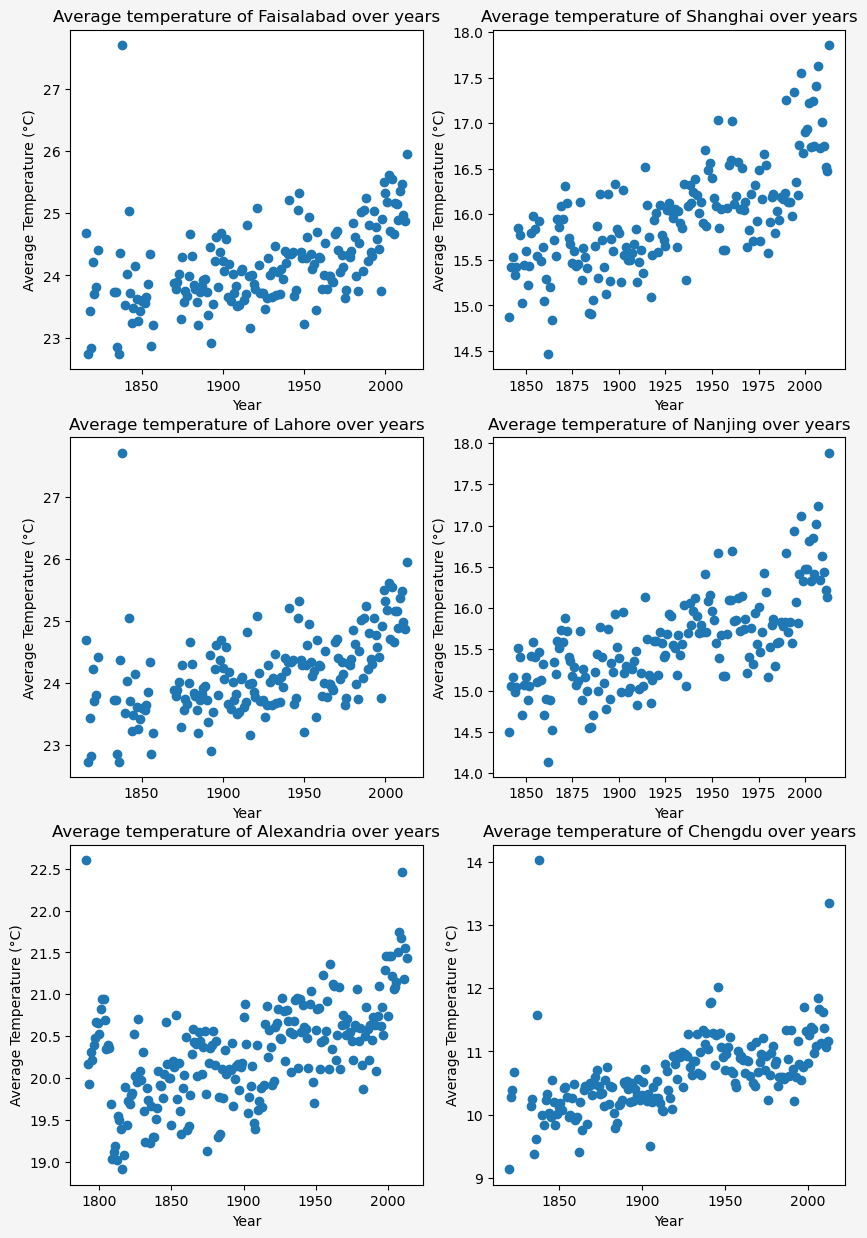

In [59]:
fig, ax = plt.subplots(3, 2, figsize=(10, 15))
SameLatiArray = np.array(SameLati_Shanghai).reshape(3, 2)
fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(3):
    for j in range(2):
        
        ax[i, j].scatter(x=YearTempPivotTable.index, y=YearTempPivotTable[SameLatiArray[i, j]], )
        ax[i, j].set_title("Average temperature of "+ SameLatiArray[i, j] +" over years")
        ax[i, j].set_xlabel("Year")
        ax[i, j].set_ylabel("Average Temperature (°C)")

#### Maximum temperature changes over year
The graph presents the trend of maximum temperature in the previously mentioned cities, with each dot representing the maximum temperature recorded over twelve months in a given year. The cities considered are Lahore, Faisalabad, Shanghai, Nanjing, Chengdu, and Alexandria.

The data reveals that Lahore and Faisalabad have experienced an upward trend in their maximum temperature, with an increase of 1-2°C over the past two centuries. This trend is consistent with the overall trend of climate change observed globally. In contrast, the maximum temperature in Shanghai and Nanjing varies significantly, making it challenging to determine a clear trend. Chengdu shows a slight upward trend in its maximum temperature over time.

Furthermore, the data shows that Alexandria experienced a sharp increase of 2°C in its maximum temperature between 1975 and 2020. This trend is alarming, and it indicates the increasing severity of climate change and its consequences on local and global scales.

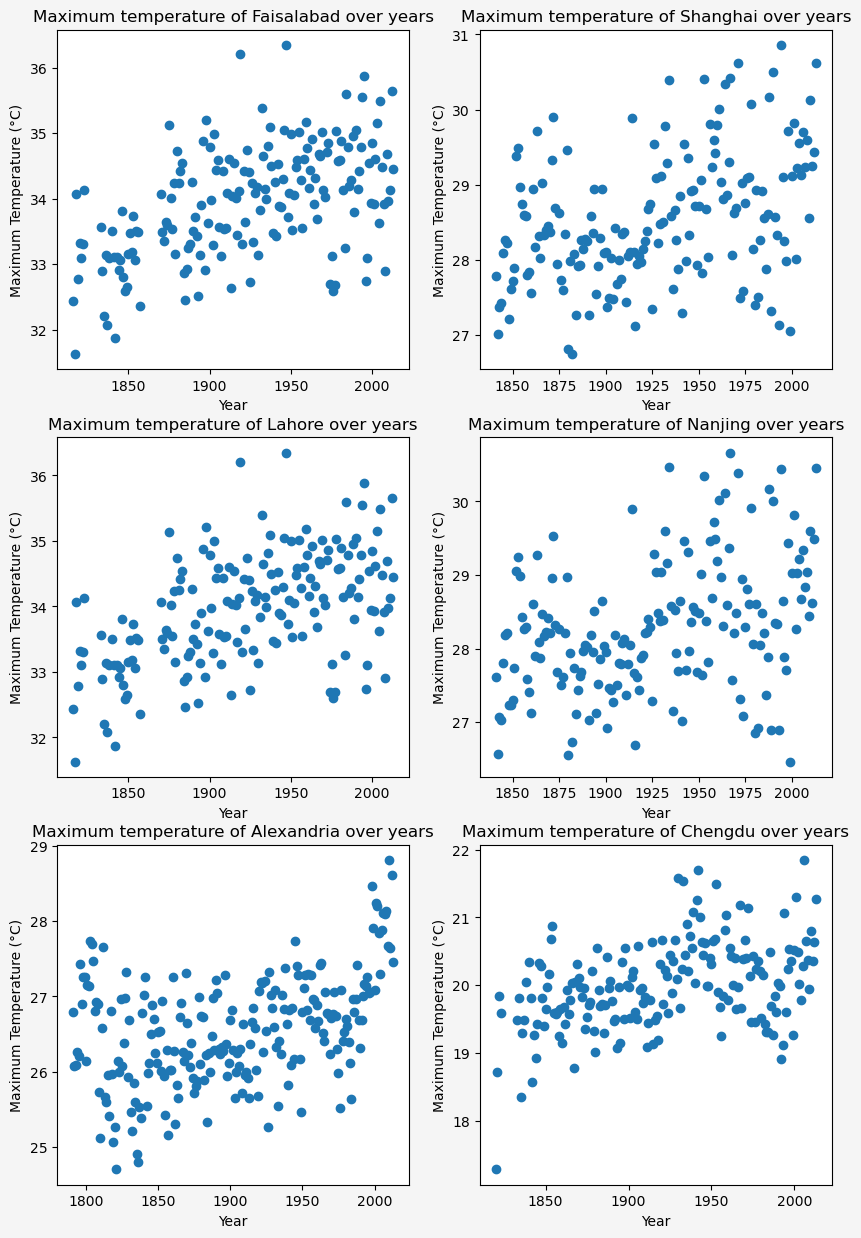

In [60]:
datapicked = YearTempMaxPivotTable
fig, ax = plt.subplots(3, 2, figsize=(10, 15))
SameLatiArray = np.array(SameLati_Shanghai).reshape(3, 2)
fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(3):
    for j in range(2):
        
        ax[i, j].scatter(x=datapicked.index, y=datapicked[SameLatiArray[i, j]], )
        ax[i, j].set_title("Maximum temperature of "+ SameLatiArray[i, j] +" over years")
        ax[i, j].set_xlabel("Year")
        ax[i, j].set_ylabel("Maximum Temperature (°C)")

#### Standand deviation of temperature changes over year
The graph depicts the trend of temperature standard deviation in the cities mentioned earlier. Each dot on the graph represents the standard deviation of temperature recorded over twelve months in a given year. A higher standard deviation indicates greater variability in temperature over time.

The data shows that none of the cities exhibit a significant upward or downward trend in temperature standard deviation over time. Lahore and Faisalabad have a relatively stable standard deviation compared to the other cities. This stability implies that the climate in these cities has been relatively consistent over the years.

An increase in temperature standard deviation indicates greater variability in temperature, which could potentially result in more extreme weather events such as heatwaves, cold spells, and storms. However, the standard deviation of temperature in the considered cities appears to be relatively stable over time.

Overall, this graph suggests that while there is no significant trend in temperature standard deviation in these cities.

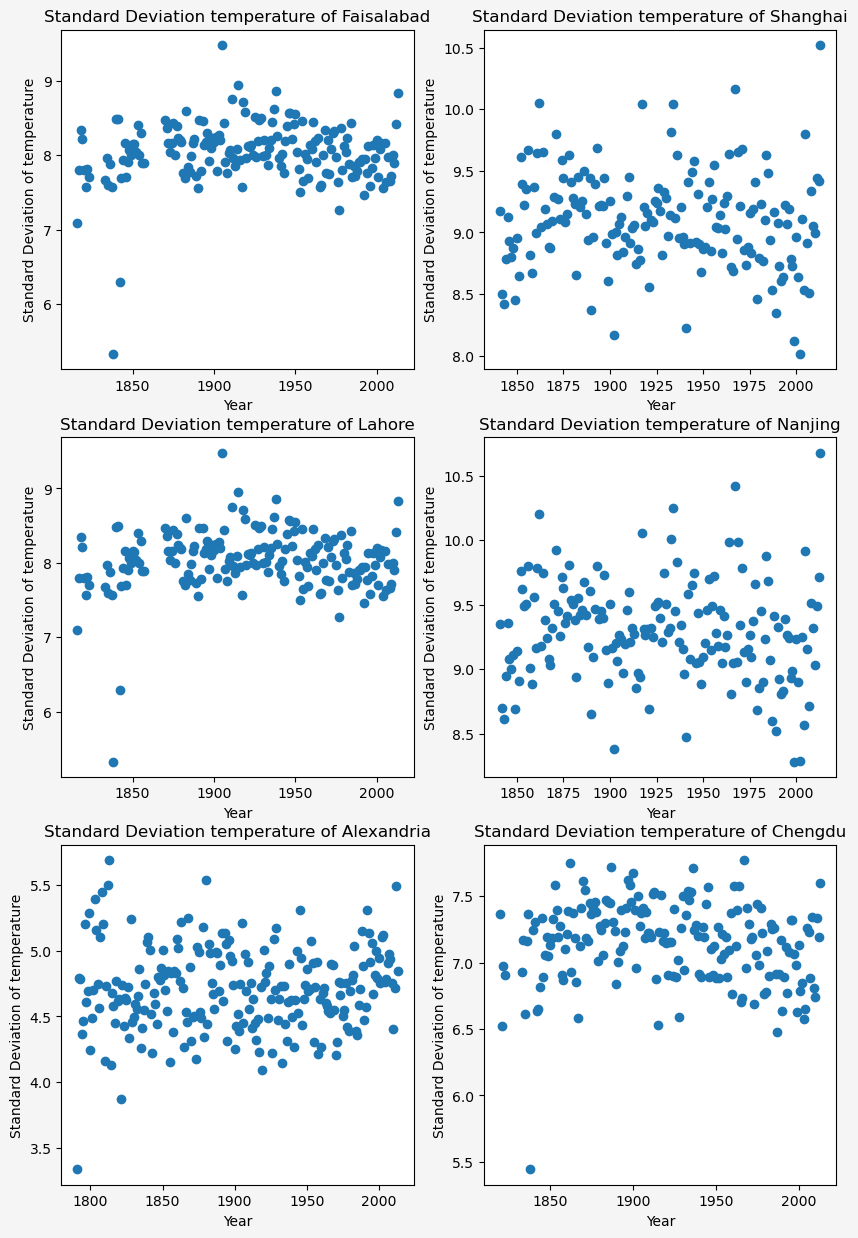

In [64]:
datapicked = YearTempStdPivotTable
fig, ax = plt.subplots(3, 2, figsize=(10, 15))
SameLatiArray = np.array(SameLati_Shanghai).reshape(3, 2)
fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(3):
    for j in range(2):
        
        ax[i, j].scatter(x=datapicked.index, y=datapicked[SameLatiArray[i, j]], )
        ax[i, j].set_title("Standard Deviation temperature of "+ SameLatiArray[i, j])
        ax[i, j].set_xlabel("Year")
        ax[i, j].set_ylabel("Standard Deviation of temperature")

#### Temperature difference changes over year
The graph illustrates the trend of temperature difference in the cities mentioned earlier. Each dot represents the temperature difference calculated as the difference between the average temperature of the highest and lowest month in a given year.

The data indicates that, similar to temperature standard deviation, the temperature difference in these cities remains relatively stable over time. There is no significant upward or downward trend in temperature difference, suggesting that the climate in these cities has been relatively consistent over time.

A stable temperature difference indicates that the seasonal variation in temperature in these cities has remained consistent over time. This consistency could have significant implications for agriculture, as it provides some degree of predictability regarding crop growth and harvest cycles.

In conclusion, this graph highlights the importance of continuing to monitor and analyze climate data to understand the impact of climate change on our planet. While temperature difference in these cities remains relatively stable, other indicators such as rising temperatures and changes in precipitation patterns could still have significant consequences for the environment and society. 

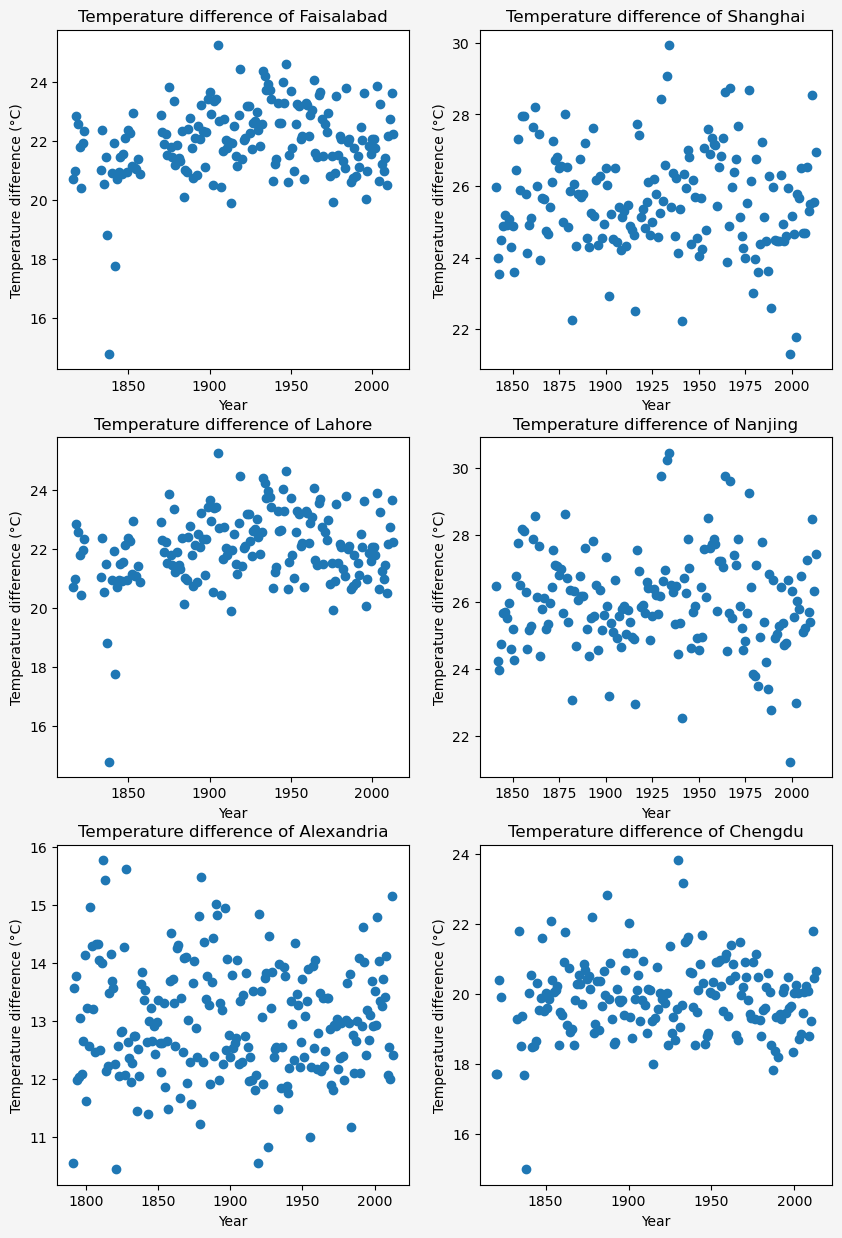

In [65]:
datapicked = YearTempDifPivotTable
fig, ax = plt.subplots(3, 2, figsize=(10, 15))
SameLatiArray = np.array(SameLati_Shanghai).reshape(3, 2)
fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(3):
    for j in range(2):
        
        ax[i, j].scatter(x=datapicked.index, y=datapicked[SameLatiArray[i, j]], )
        ax[i, j].set_title("Temperature difference of "+ SameLatiArray[i, j])
        ax[i, j].set_xlabel("Year")
        ax[i, j].set_ylabel("Temperature difference (°C)")

### Global Climate change
In this subsection we will talk about temperature change globbally. It reflect climate changes of all land and all land plus ocean over year.

#### Average temperature change of land and land plus ocean
A clear and precise statement about global warming is crucial for understanding its impact on our planet. It is observed that the average temperature of both land and ocean has been consistently rising. Over the past 250 years, the average temperature of land has increased by nearly 2°C, while the average temperature of land and ocean combined has increased by approximately 1°C over the last 200 years. Furthermore, the pace of the increase appears to be accelerating.

Text(0.5, 1.0, 'Average temperature of ocean and land of earth over years')

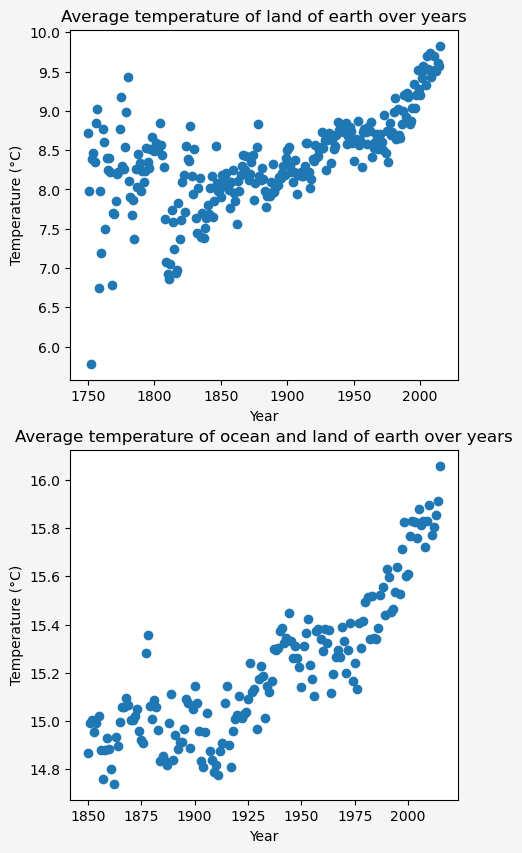

In [66]:
datapicked = YearAverageGlobal
column_picked = ["LandAverageTemperature", "LandAndOceanAverageTemperature"]
fig, ax = plt.subplots(2, 1, figsize=(5,10))

fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(2):        
    ax[i].scatter(x=datapicked.index, y=datapicked[column_picked[i]])
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel("Temperature (°C)")
    
ax[0].set_title("Average temperature of land of earth over years")
ax[1].set_title("Average temperature of ocean and land of earth over years")

#### Maximum temperature change of land and land plus ocean
The data clearly shows that global warming is impacting the maximum temperature of our planet, with both land and ocean experiencing an upward trend in temperature. Over the last three decades, the maximum temperature of land has increased by 1°C, indicating a rapid rate of change. Meanwhile, the maximum temperature of land plus ocean has increased by 1°C over the last two centuries, representing a more gradual but steady increase.

Text(0.5, 1.0, 'Maximum temperature of ocean and land of earth over years')

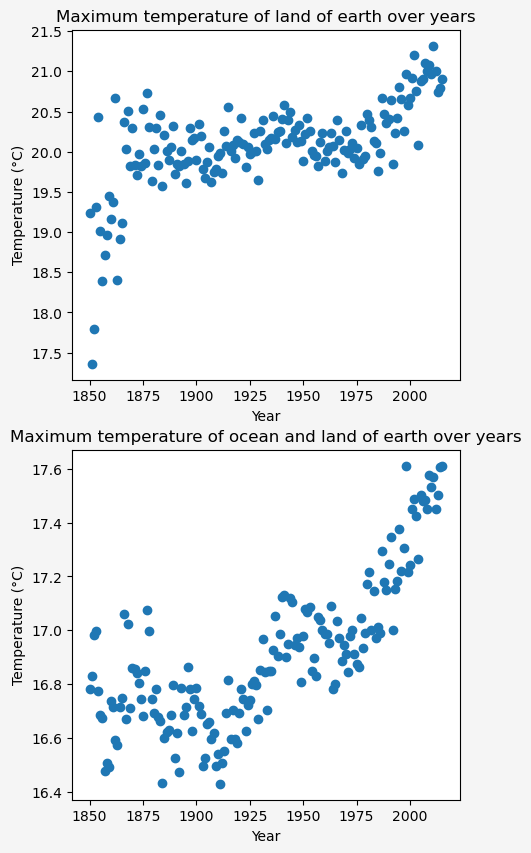

In [36]:
datapicked = YearMaxGlobal
column_picked = ["LandMaxTemperature", "LandAndOceanAverageTemperature"]
fig, ax = plt.subplots(2, 1, figsize=(5,10))

fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(2):        
    ax[i].scatter(x=datapicked.index, y=datapicked[column_picked[i]])
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel("Temperature (°C)")
    
ax[0].set_title("Maximum temperature of land of earth over years")
ax[1].set_title("Maximum temperature of ocean and land of earth over years")

#### Temperature difference change of land and land plus ocean
The temperature difference is a measure of the variation between the average temperatures of the hottest and coldest months in a given location. It is an important indicator of the overall climate conditions in a region. Both on land and in the ocean, the temperature difference has been experiencing a gradual decrease over the years. This implies that the coldest months are not as cold as they used to be in the past.

This trend can be attributed to several factors, including climate change and global warming. The rise in global temperatures has led to a decrease in temperature differences, as the warmer months are becoming even warmer while the colder months are becoming less cold. As a result, regions that once experienced distinct seasons with significant temperature differences are now experiencing milder, more uniform climates.

At the same time, the average global temperature has been on a steady rise, indicating a clear warming trend. 

Text(0.5, 1.0, 'Temperature difference of ocean and land of earth over years')

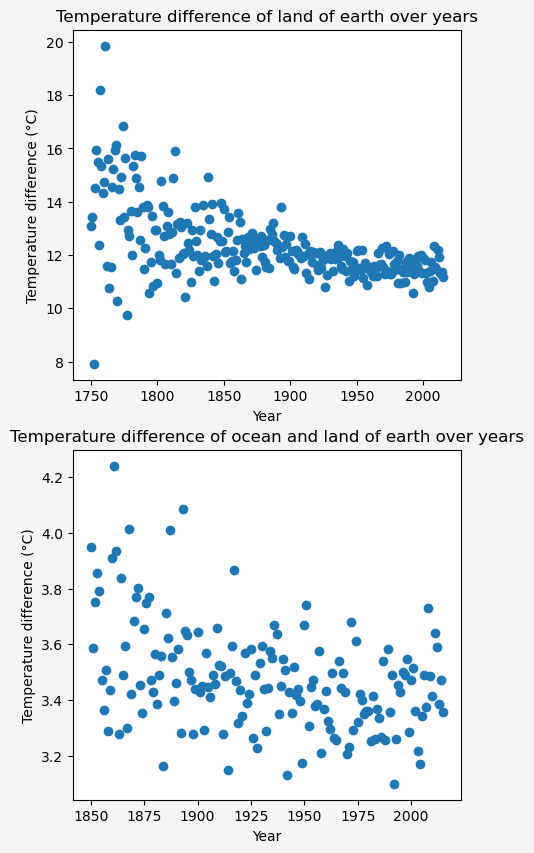

In [37]:
datapicked = YearDifGlobal
column_picked = ["LandAverageTemperature", "LandAndOceanAverageTemperature"]
fig, ax = plt.subplots(2, 1, figsize=(5, 10))

fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(2):        
    ax[i].scatter(x=datapicked.index, y=datapicked[column_picked[i]])
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel("Temperature difference (°C)")
    
ax[0].set_title("Temperature difference of land of earth over years")
ax[1].set_title("Temperature difference of ocean and land of earth over years")

#### Standard deviation of temperature land and land plus ocean
In the case of temperature, the standard deviation can provide insights into the consistency or variability of temperatures over a certain period, such as 12 months.

In this context, the standard deviation of temperature can help us understand how the average temperature of land and land plus ocean varies from the mean temperature over the course of a year. Interestingly, recent studies have shown that there is a slight downward trend in the standard deviation of both land and land plus ocean temperatures, which suggests that temperatures are becoming more consistent and closer to the mean.

However, this trend should not be confused with a decrease in the average temperature itself, as it is actually increasing. In fact, there is an upward trend in the global average temperature, which indicates that even the coldest month of the year is experiencing slightly warmer temperatures that are closer to the overall mean temperature.

Text(0.5, 1.0, 'Standard Deviation of temperature ocean and land of earth over years')

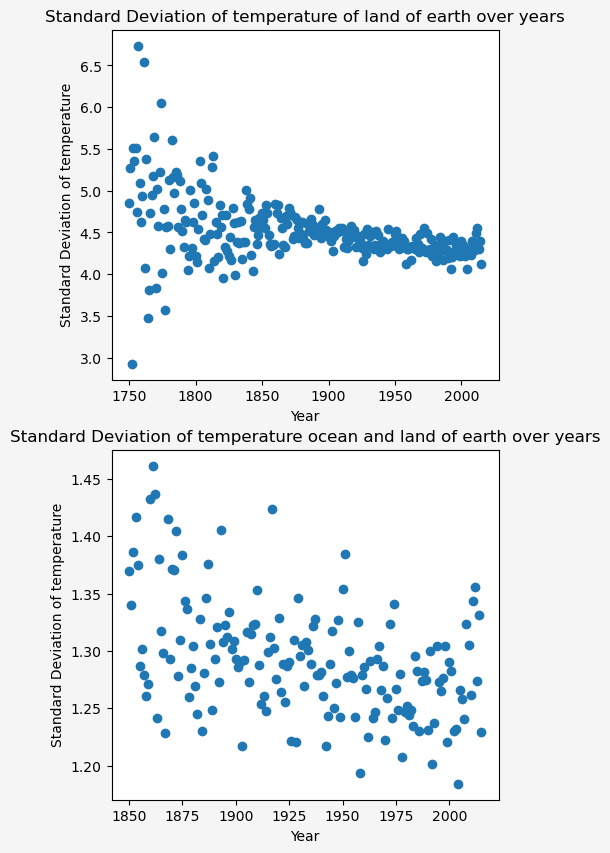

In [38]:
datapicked = YearStdGlobal
column_picked = ["LandAverageTemperature", "LandAndOceanAverageTemperature"]
fig, ax = plt.subplots(2, 1, figsize=(5, 10))

fig.set_facecolor((0.96, 0.96, 0.96))

for i in range(2):        
    ax[i].scatter(x=datapicked.index, y=datapicked[column_picked[i]])
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel("Standard Deviation of temperature")
    
ax[0].set_title("Standard Deviation of temperature of land of earth over years")
ax[1].set_title("Standard Deviation of temperature ocean and land of earth over years")

#### Count how many years that the average temperature of land exceed 8.5 °C
There is a clear and concerning trend in the average temperature of land over time. Historical data reveals that from 1850 to 1870, there were no years with average temperatures exceeding 8.5°C. However, this changed dramatically in the following years as the number of years with such temperatures increased.

In recent times, the situation has become even more alarming. Between 1950 and 1990, and again from 1990 to 2010, every year recorded average land temperatures exceeding 8.5°C. This consistent rise in temperature is a significant cause for concern, and it highlights the urgency with which we must address the issue of climate change.

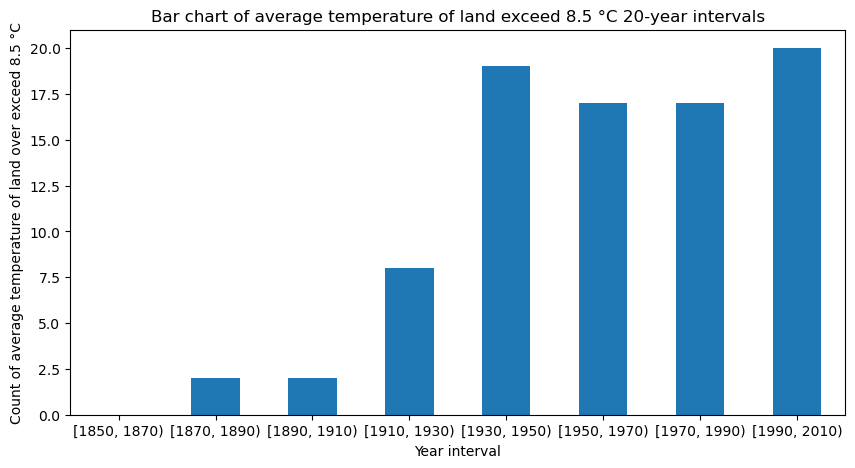

In [39]:
df = YearAverageGlobal


df['Year_bin'] = pd.cut(df.index, bins=range(1850, 2015, 20), right=False)
binned_data = df.groupby('Year_bin')['Land>=8.5'].sum()

plt.figure(figsize=(10,5))
binned_data.plot.bar(x='Year_bin', y='Land>=8.5', rot=0)
plt.xlabel('Year interval')
plt.ylabel('Count of average temperature of land over exceed 8.5 °C')
plt.title('Bar chart of average temperature of land exceed 8.5 °C 20-year intervals')
plt.show()

#### Count how many years that the average temperature of land plus ocean exceed 15.5 °C
It is evident from the data that there has been a significant increase in the average temperature of land and ocean over the last century. Between 1850 and 1970, there were no instances where the average temperature surpassed the 15.5°C threshold. However, this trend shifted during the period from 1970 to 1990, where only three years saw the temperature exceed the limit. This limited increase during the two decades is probably due to the early environmental regulations implemented by countries worldwide.

However, the subsequent two decades (1990-2010) witnessed a massive surge in global temperatures. There were 18 years during this time where the average temperature of land and ocean was recorded above the 15.5°C threshold. Such a significant and unprecedented increase in temperature can be attributed to the increasing levels of carbon dioxide and other greenhouse gases in the atmosphere, which trap heat and contribute to global warming.

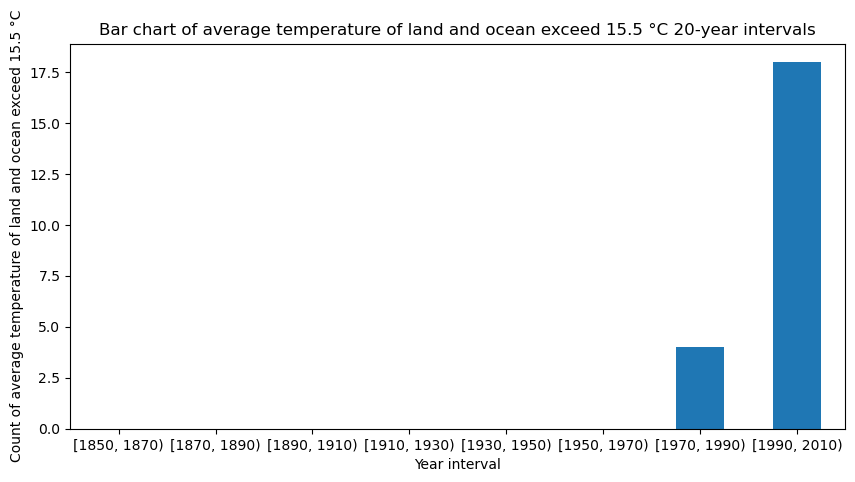

In [40]:
df = YearAverageGlobal


df['Year_bin'] = pd.cut(df.index, bins=range(1850, 2015, 20), right=False)
binned_data = df.groupby('Year_bin')['LandOcean>=15.5'].sum()

plt.figure(figsize=(10,5))
binned_data.plot.bar(x='Year_bin', y='LandOcean>=15.5', rot=0)
plt.xlabel('Year interval')
plt.ylabel('Count of average temperature of land and ocean exceed 15.5 °C')
plt.title('Bar chart of average temperature of land and ocean exceed 15.5 °C 20-year intervals')
plt.show()

#### Count how many years that the maximum temperature of land exceed 20.5 °C
Between 1850 and 1990, the maximum land temperature exceeding 20.5°C was a rare occurrence, with only 0 to 2 years experiencing such high temperatures in each 20-year interval. However, in the interval between 1990 and 2010, the trend shifted dramatically. During this period, the number of years with a maximum temperature above 20.5°C surged, with 14 years experiencing such high temperatures.

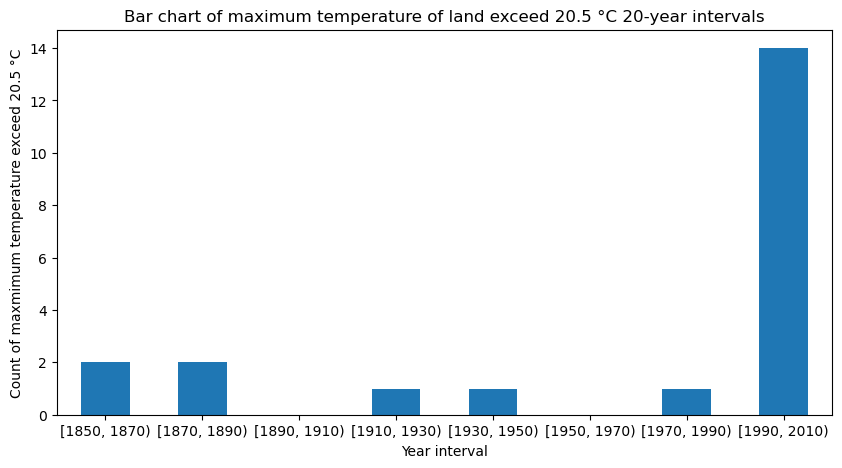

In [41]:
df = YearMaxGlobal

df['Year_bin'] = pd.cut(df.index, bins=range(1850, 2015, 20), right=False)
binned_data = df.groupby('Year_bin')['Land>=20.5'].sum()

plt.figure(figsize=(10,5))
binned_data.plot.bar(x='Year_bin', y='Land>=20.5', rot=0)
plt.xlabel('Year interval')
plt.ylabel('Count of maxmimum temperature exceed 20.5 °C')
plt.title('Bar chart of maximum temperature of land exceed 20.5 °C 20-year intervals')
plt.show()

#### Count how many years that the maximum temperature of land exceed 17 °C
Analysis of historical temperature data reveals that there has been a significant change in global temperature patterns over the past century. Between the years 1850 and 1930, there were typically no more than two years in any 20-year period where the maximum temperature of both land and ocean surfaces exceeded 17°C. However, since 1930, there has been a clear upward trend in global temperatures.

From 1930 to 1990, the number of years where the maximum temperature exceeded 17°C increased significantly. On average, there were 7.5 such years in each 20-year interval during this period. This trend continued into the 1990s, and between 1990 and 2010, every single year saw temperatures exceeding 17°C for both land and ocean surfaces. This trend suggests a continuing pattern of global warming that has accelerated in recent decades.

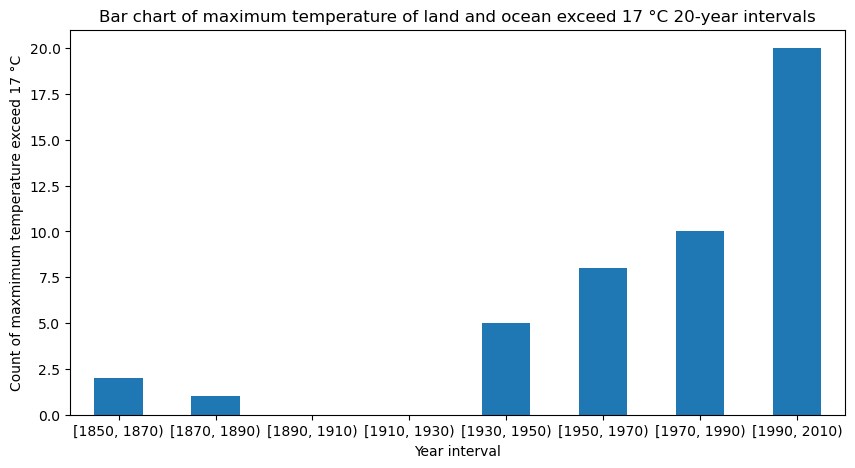

In [42]:
df = YearMaxGlobal

df['Year_bin'] = pd.cut(df.index, bins=range(1850, 2015, 20), right=False)
binned_data = df.groupby('Year_bin')['LandOcean>=17'].sum()

plt.figure(figsize=(10,5))
binned_data.plot.bar(x='Year_bin', y='LandOcean>=17', rot=0)
plt.xlabel('Year interval')
plt.ylabel('Count of maxmimum temperature exceed 17 °C')
plt.title('Bar chart of maximum temperature of land and ocean exceed 17 °C 20-year intervals')
plt.show()

These plots shows strong evidence of rising temperatures not only in specific cities, but also globally. The six cities located near 31N latitude all display an apparent increasing trend, with an average increase of 1-2°C over the last two centuries. The stability of the climate, reflected by the standard deviation and temperature difference, remains relatively unchanged over time, indicating that the temperature across these six cities is relatively stable across 12 months. Additionally, the average temperature of land and land plus ocean has risen approximately 1°C and 2°C, respectively, over the last two centuries, with a noticeable acceleration in the trend over the last 60 years. The maximum temperature for both land and land plus ocean also follows a similar trend to their average temperature. The standard deviation and temperature difference for both land and land plus ocean display a slight decreasing trend, indicating a less discrete global average temperature over the 12 months, with the coldest month being less cold than in the past. A comparison of average and maximum temperatures for both land and land plus ocean reveals an increase in the frequency of temperatures exceeding 8.5°C for land, 15.5°C for land plus ocean, 20.5°C for land, and 17°C for land plus ocean in the last century. All of these observations provide strong evidence that global warming is a real phenomenon.

# 2. Project Two

## 2.1 The Message
The main question surrounding global warming is whether the observed trends are occurring globally or only in certain areas. While studying the temperature of six cities and the global average, it was concluded that temperatures are rising by 1-2 degrees Celsius. However, this study alone may not be sufficient to draw any definitive conclusions. To gain a better understanding of whether temperature changes are happening uniformly across the globe, the next step would be instead of studying the average and maximum temperature globally changes over year (Y variables), it will be subgrouped by different continents and countries. This approach would allow for a better understanding of whether all locations are experiencing an increasing trend in temperature or if there are certain areas that are being affected more severely.

We will create several different line graphs that show the maximum and average temperature of different countries within the same continent in the same graph. This will allow for easy comparison between different locations and the identification of any regional trends. Additionally, we will average the temperature data for each continent using the individual country data and plot all continent trends in one graph. This will provide a more comprehensive overview of global temperature trends and allow for the identification of any significant patterns or anomalies. By using this approach, we hope to gain a more thorough understanding of the global temperature trends and their distribution across different regions.

In [135]:
country_temp_copy = country_temp.copy()
country_temp_copy["dt"] = country_temp_copy["dt"].astype(str)
for row in country_temp_copy.iterrows():
    index_value, column_value = row
    
    time = column_value["dt"]
    
    country_temp_copy.at[index_value, "Year"] = int(time[0:4])

In [179]:
year_country_temp = country_temp_copy

In [180]:
import pandas as pd
import pycountry

df = year_country_temp

def get_continent(row):
    try:
        country_code = pc.country_name_to_country_alpha2(row['Country'])
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        return continent_code
    except KeyError:
        return None

df['continent'] = df.apply(get_continent, axis=1)
year_country_temp = df

In [194]:
avg_year_country_temp = year_country_temp.groupby(["Country", "Year", "continent"]).mean()

In [197]:
max_year_country_temp = year_country_temp.groupby(["Country", "Year", "continent"]).max()

In [249]:
avg_year_country_temp.reset_index(inplace=True)
max_year_country_temp.reset_index(inplace=True)
x = set(year_country_temp["continent"])
x

{'AF', 'AS', 'EU', 'NA', None, 'OC', 'SA'}

In [250]:
avg_year_country_temp.set_index("continent", inplace=True)
max_year_country_temp.set_index("continent", inplace=True)

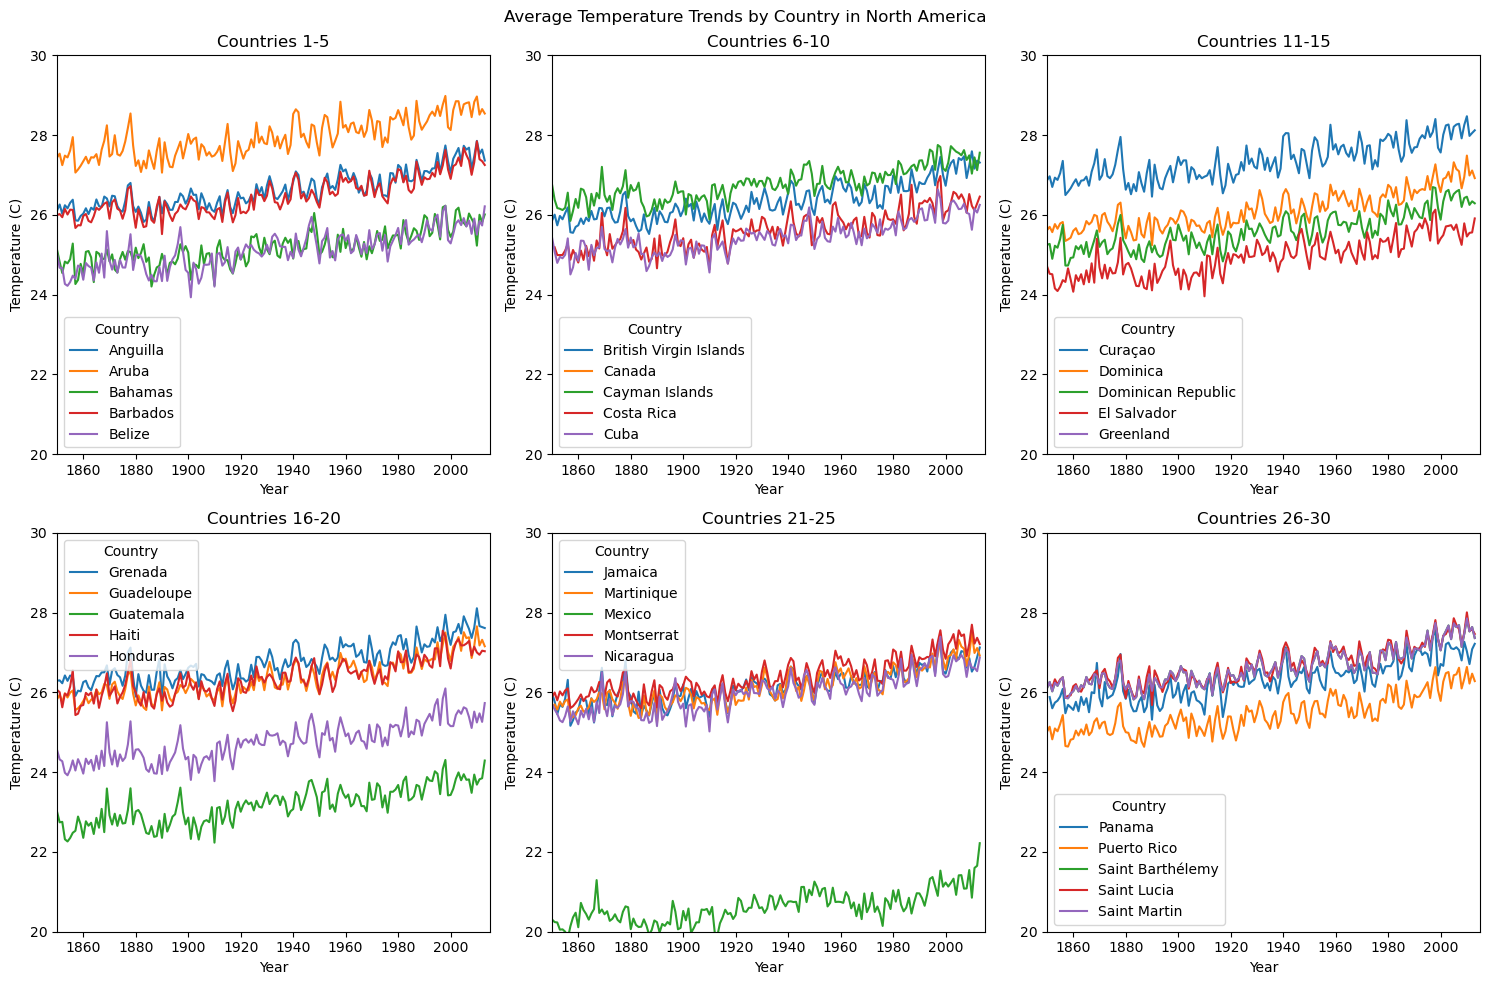

In [251]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10)) 
df = avg_year_country_temp.loc["NA"]
df.reset_index(inplace=True)

countries = df['Country'].unique() 
for i, ax in enumerate(axs.flatten()): 
    if i >= len(countries): 
        break
    start = i * 5 
    end = min((i + 1) * 5, len(countries)) 
    chunk = countries[start:end] 
    data = df[df['Country'].isin(chunk)] 
    pivoted_data = pd.pivot_table(data, values='AverageTemperature', index='Year', columns='Country')
    pivoted_data.plot(ax=ax, kind='line') 
    ax.set_title(f'Countries {start+1}-{end}') 
    ax.set_xlabel('Year') 
    ax.set_ylabel('Temperature (C)') 
    ax.set_xlim(1850, 2015)
    ax.set_ylim(20,30)
plt.suptitle('Average Temperature Trends by Country in North America') 
plt.tight_layout() 
plt.show() 

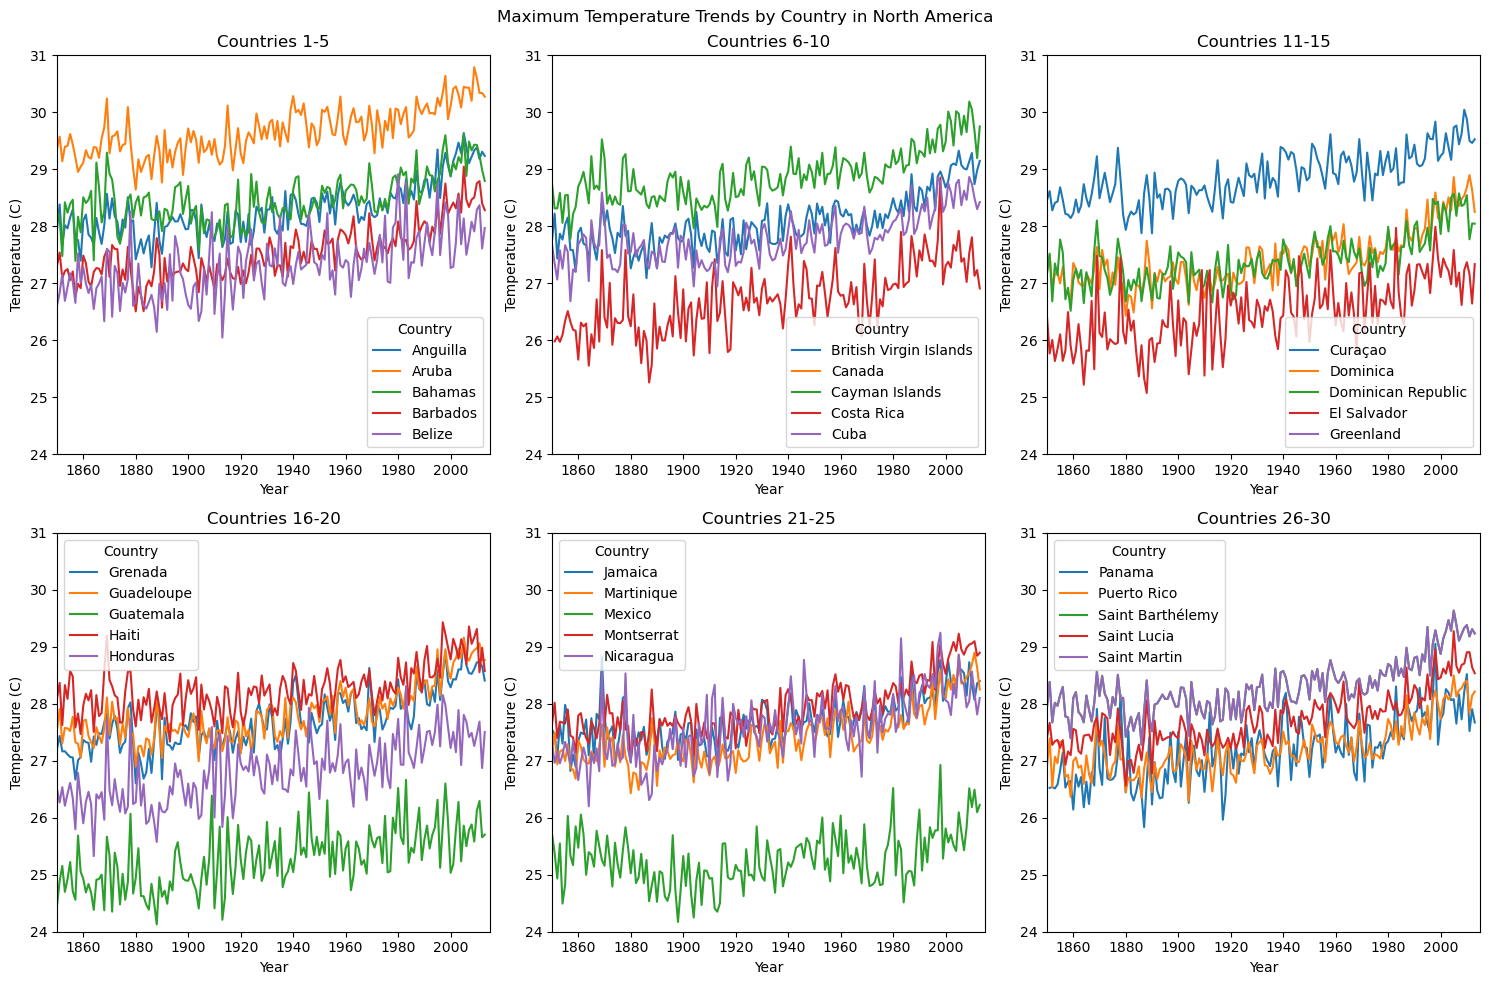

In [264]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10)) 
df = max_year_country_temp.loc["NA"]
df.reset_index(inplace=True)

countries = df['Country'].unique() 
for i, ax in enumerate(axs.flatten()): 
    if i >= len(countries): 
        break
    start = i * 5 
    end = min((i + 1) * 5, len(countries)) 
    chunk = countries[start:end] 
    data = df[df['Country'].isin(chunk)] 
    pivoted_data = pd.pivot_table(data, values='AverageTemperature', index='Year', columns='Country')
    pivoted_data.plot(ax=ax, kind='line') 
    ax.set_title(f'Countries {start+1}-{end}') 
    ax.set_xlabel('Year') 
    ax.set_ylabel('Temperature (C)') 
    ax.set_xlim(1850, 2015)
    ax.set_ylim(24,31)
plt.suptitle('Maximum Temperature Trends by Country in North America') 
plt.tight_layout() 
plt.show() 

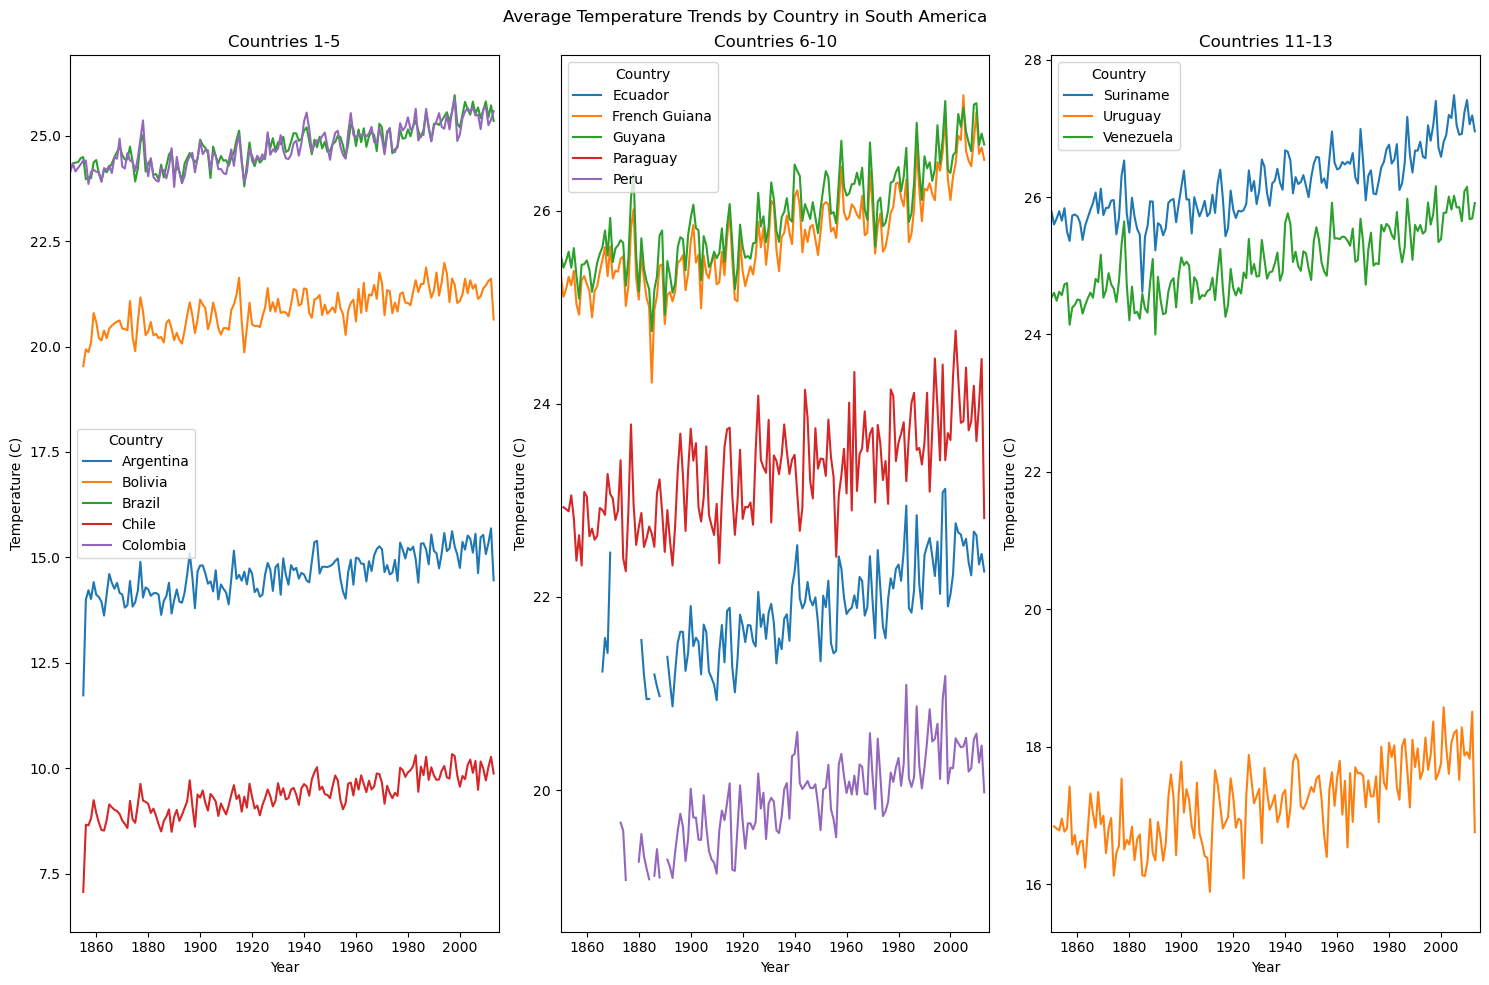

In [260]:
fig, axs = plt.subplots(1, 3, figsize=(15, 10)) 

df = avg_year_country_temp.loc["SA"]
df.reset_index(inplace=True)

countries = df['Country'].unique()

for i, ax in enumerate(axs.flatten()): 
    if i >= len(countries): 
        break
    start = i * 5 
    end = min((i + 1) * 5, len(countries)) 
    chunk = countries[start:end] 
    data = df[df['Country'].isin(chunk)] 
    pivoted_data = pd.pivot_table(data, values='AverageTemperature', index='Year', columns='Country')
    pivoted_data.plot(ax=ax, kind='line') 
    ax.set_title(f'Countries {start+1}-{end}') 
    ax.set_xlabel('Year') 
    ax.set_ylabel('Temperature (C)') 
    ax.set_xlim(1850, 2015)
plt.suptitle('Average Temperature Trends by Country in South America') 
plt.tight_layout() 
plt.show() 

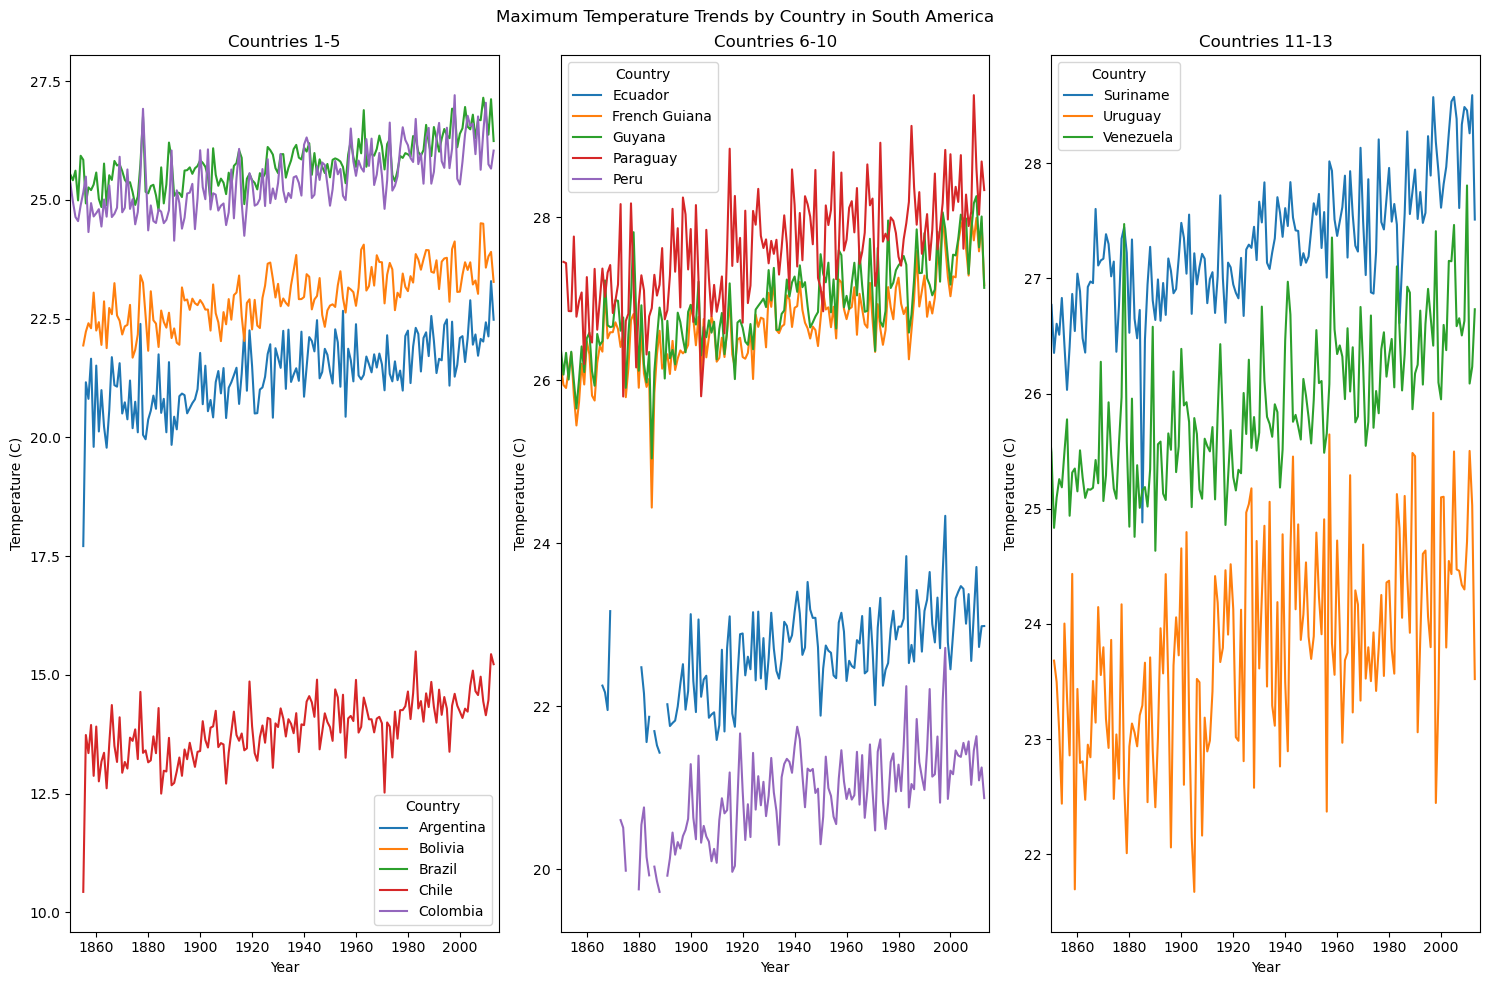

In [262]:
fig, axs = plt.subplots(1, 3, figsize=(15, 10)) 

df = max_year_country_temp.loc["SA"]
df.reset_index(inplace=True)

countries = df['Country'].unique()

for i, ax in enumerate(axs.flatten()): 
    if i >= len(countries): 
        break
    start = i * 5 
    end = min((i + 1) * 5, len(countries)) 
    chunk = countries[start:end] 
    data = df[df['Country'].isin(chunk)] 
    pivoted_data = pd.pivot_table(data, values='AverageTemperature', index='Year', columns='Country')
    pivoted_data.plot(ax=ax, kind='line') 
    ax.set_title(f'Countries {start+1}-{end}') 
    ax.set_xlabel('Year') 
    ax.set_ylabel('Temperature (C)') 
    ax.set_xlim(1850, 2015)
plt.suptitle('Maximum Temperature Trends by Country in South America') 
plt.tight_layout() 
plt.show() 

## 6. Citation
Berkeley Earth. (n.d.). Climate Change: Earth Surface Temperature Data [Dataset]. Kaggle. Retrieved from https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data